#**Name: Nader Mohamed Elhadedy**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
# helping libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **- Inspecting and cleaning Dataset**

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head(10)

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1
5            5      116             74  ...                     0.201   30        0
6            3       78             50  ...                     0.248   26        1
7           10      115              0  ...                     0.134   29        0
8            2      197             70  ...                     0.158   53        1
9            8      125             96  ...                     0.232   54        1

[10 rows x 9 columns]

In [ ]:
df.tail()

Pregnancies  Glucose  ...  Age  Outcome
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[5 rows x 9 columns]

In [ ]:
df.describe().T

count        mean  ...        75%     max
Pregnancies               768.0    3.845052  ...    6.00000   17.00
Glucose                   768.0  120.894531  ...  140.25000  199.00
BloodPressure             768.0   69.105469  ...   80.00000  122.00
SkinThickness             768.0   20.536458  ...   32.00000   99.00
Insulin                   768.0   79.799479  ...  127.25000  846.00
BMI                       768.0   31.992578  ...   36.60000   67.10
DiabetesPedigreeFunction  768.0    0.471876  ...    0.62625    2.42
Age                       768.0   33.240885  ...   41.00000   81.00
Outcome                   768.0    0.348958  ...    1.00000    1.00

[9 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for col in df.columns:
  print(df[col].value_counts())
  print('######################################################')

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
######################################################
100    17
99     17
129    14
125    14
111    14
       ..
177     1
172     1
169     1
160     1
199     1
Name: Glucose, Length: 136, dtype: int64
######################################################
70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64
#################################

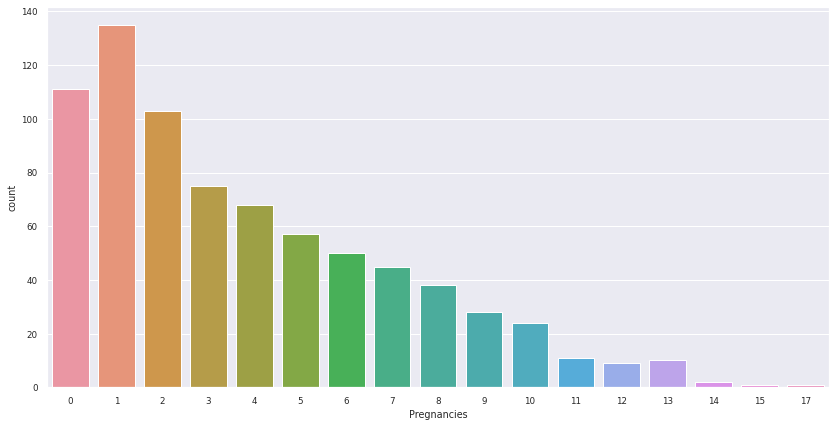

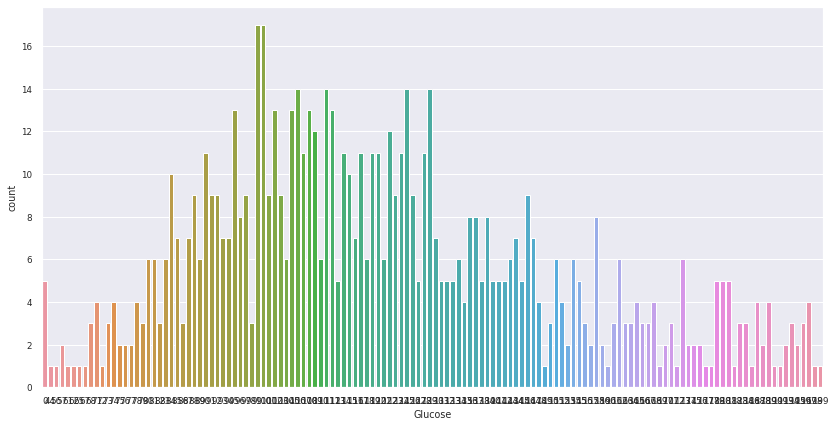

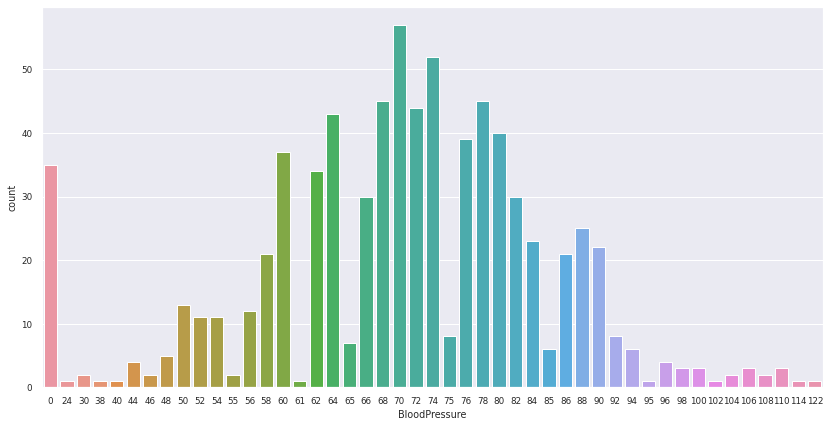

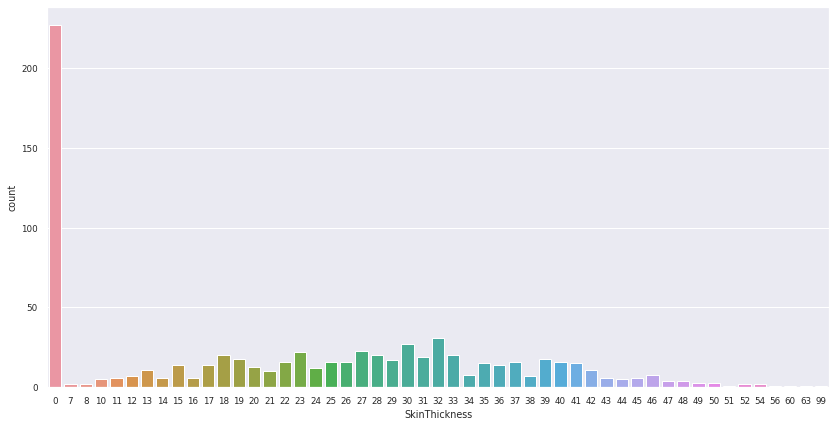

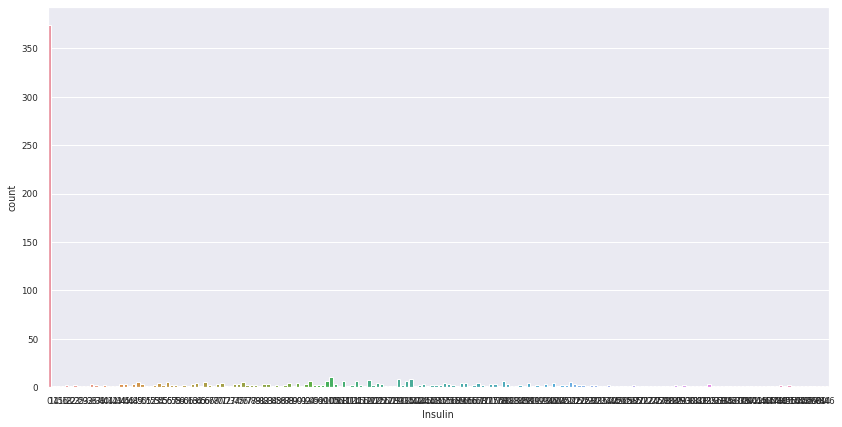

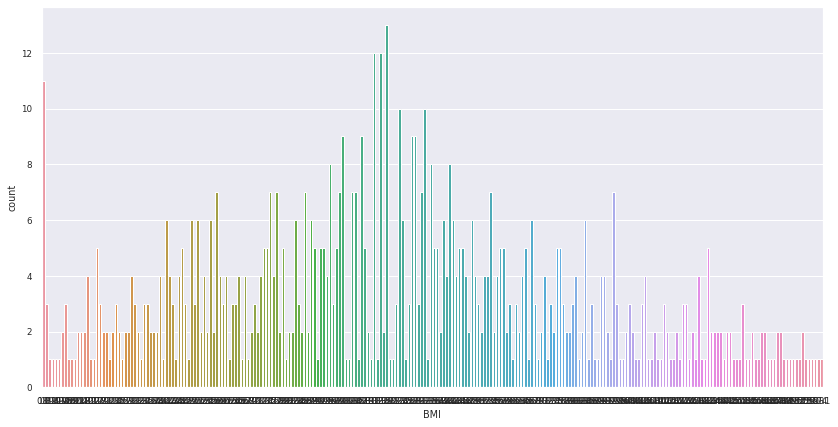

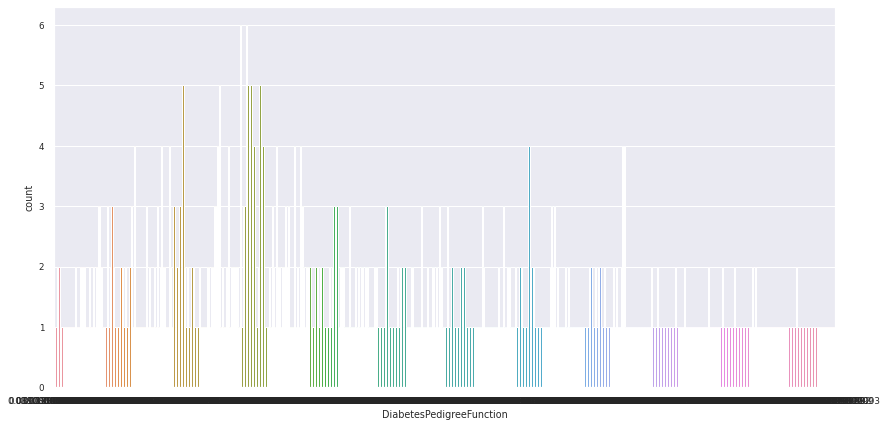

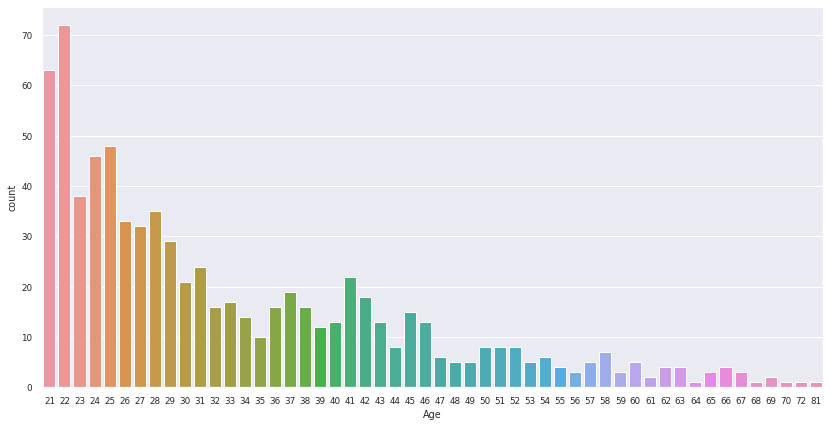

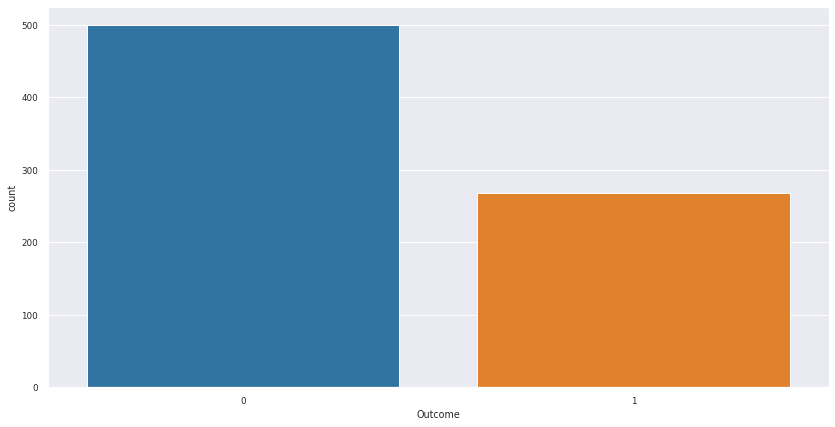

In [ ]:
for i, col in enumerate(df.columns):
    sns.set_style("darkgrid")
    sns.set_context("notebook", font_scale=0.8, rc={"lines.linewidth": 2.5})
    plt.figure(i, figsize=(14,7))
    sns.countplot(data=df, x=col)

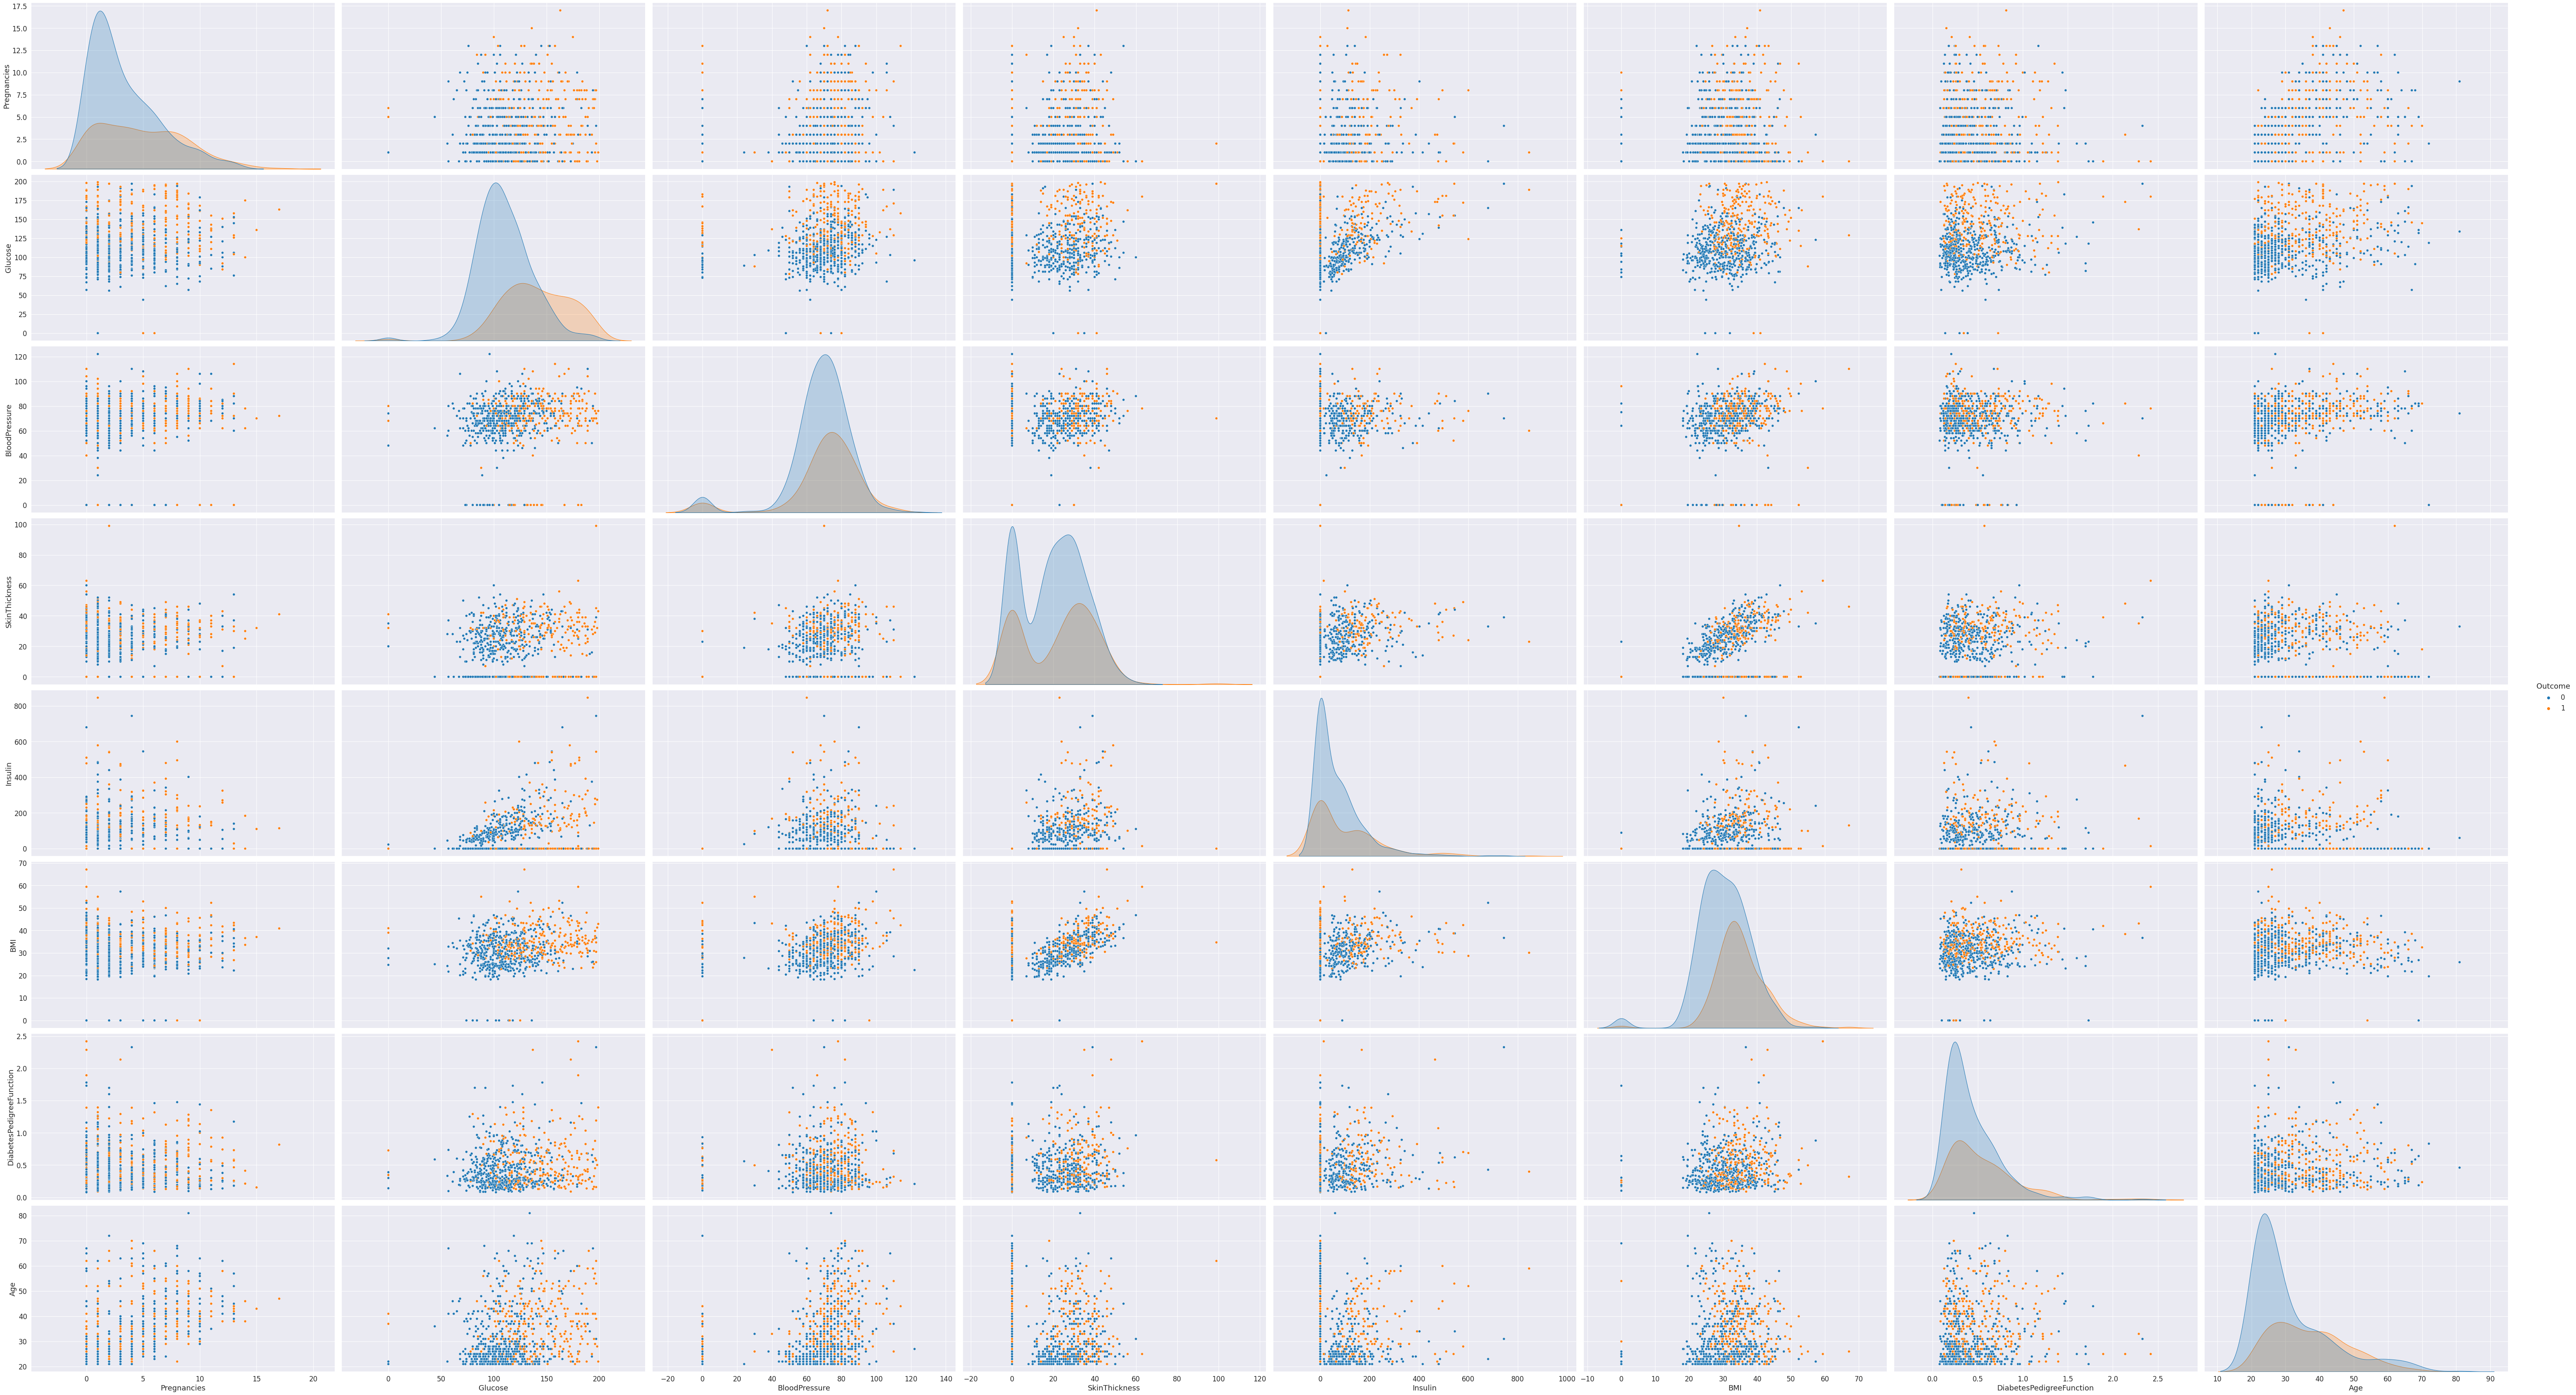

In [ ]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
 
ax = sns.pairplot(data=df, height=6, aspect=9/5, hue='Outcome')

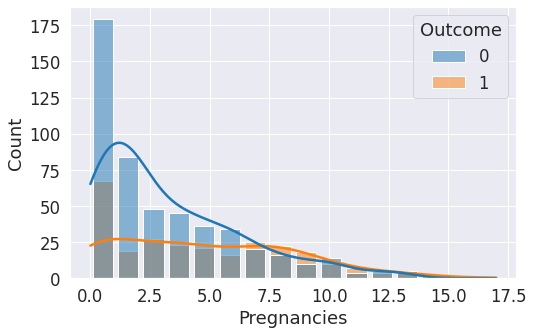

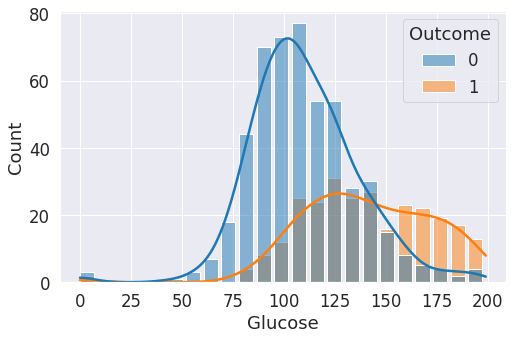

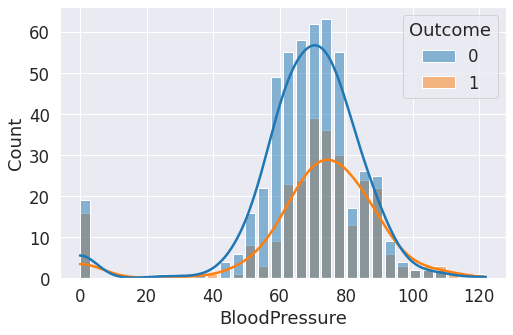

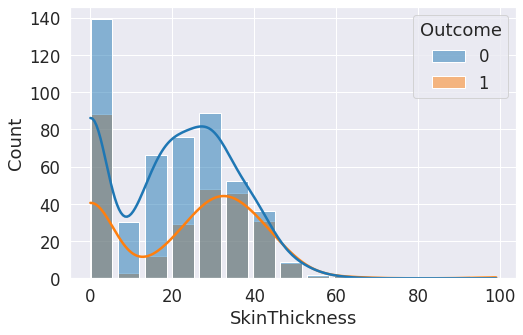

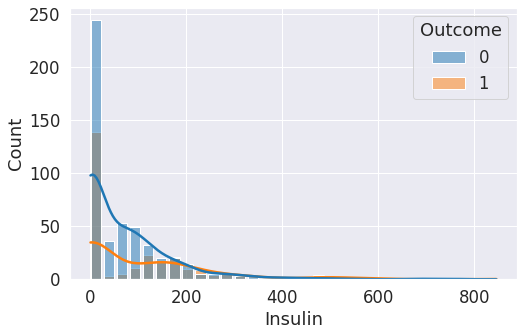

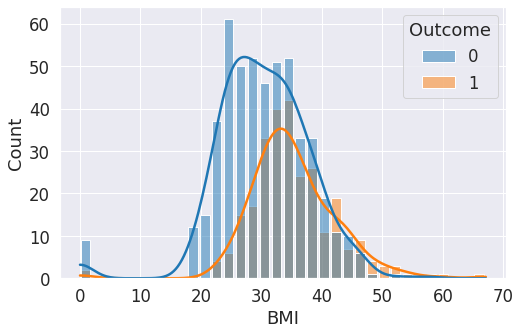

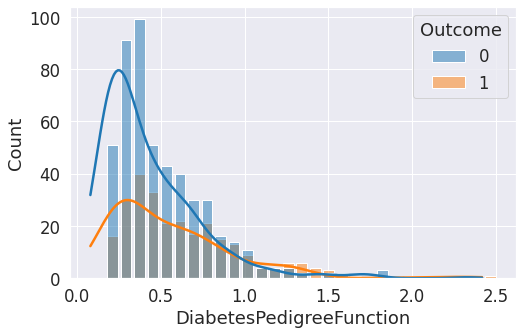

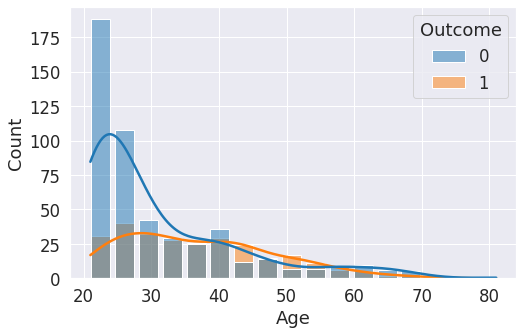

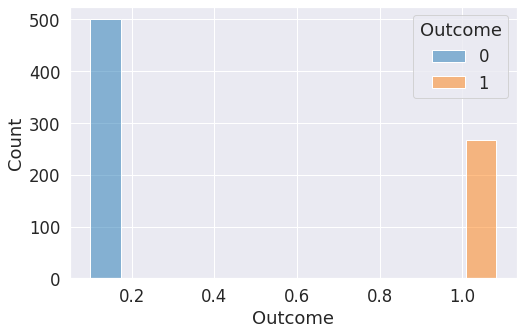

In [ ]:
for i, col in enumerate(df.columns):
  sns.set_style("darkgrid")
  sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
  plt.figure(i, figsize=(8,5))
  _ = sns.histplot(data=df, x=col, kde=True, shrink=.8, hue='Outcome')

<hr>

# **- Handling features and Taking Decisions**

In [ ]:
(df['BMI'] == 0).sum()

11

In [ ]:
(df['Glucose'] == 0).sum()

5

In [ ]:
df.drop(df[df.BMI == 0.0].index, inplace=True)
df.drop(df[df.Glucose == 0.0].index, inplace=True)

In [ ]:
df.shape

(752, 9)

In [ ]:
# scaling dataset now just for better visualization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

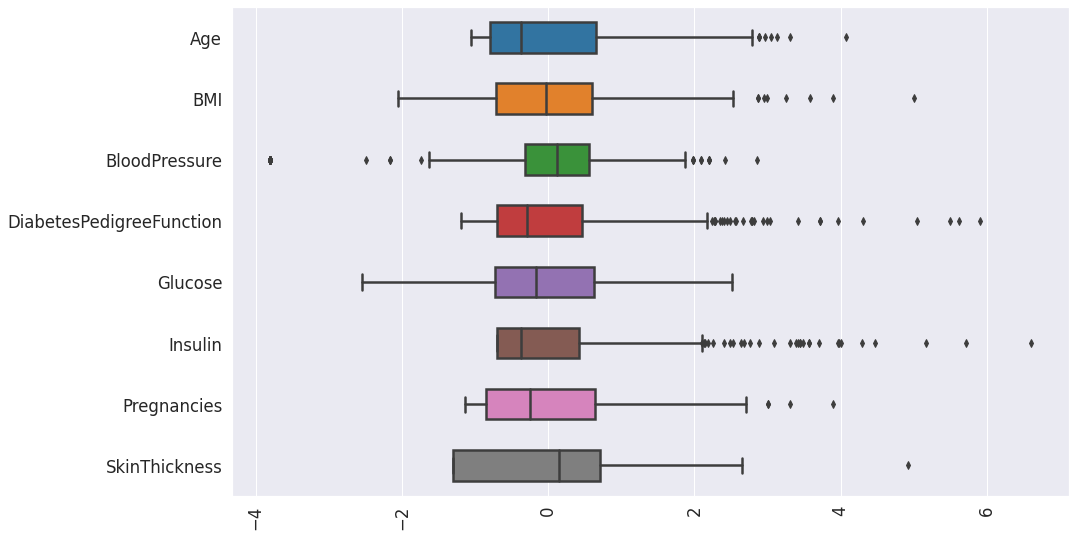

In [ ]:
plt.figure(figsize=(15,9))
_ = sns.boxplot(data=scaled_df[scaled_df.columns.difference(["Outcome"])], width=0.5, orient='h')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# removing outliers from all features only for which are after (3 * std) from (mean)
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

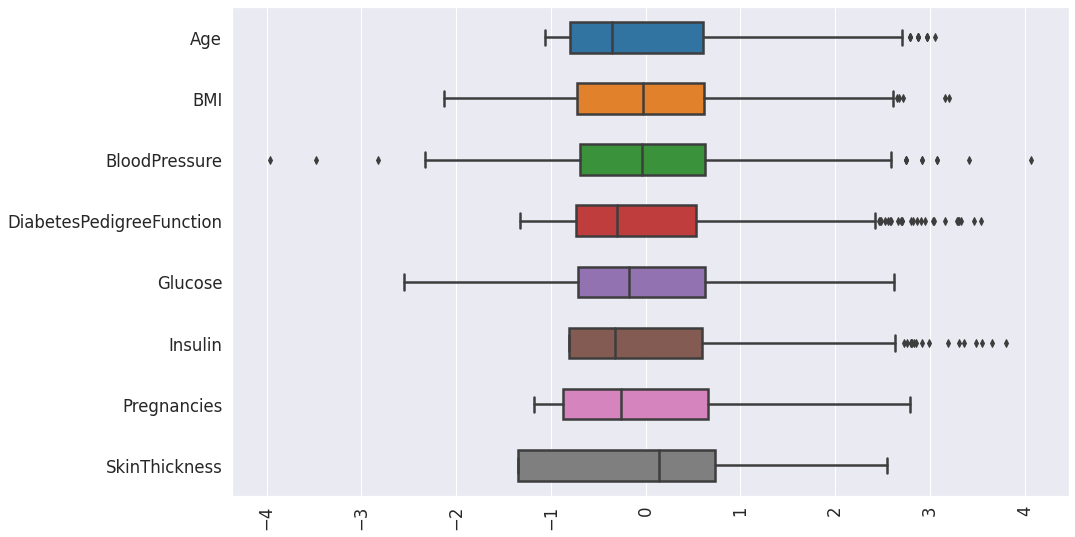

In [ ]:
new_scaled_df = pd.DataFrame(scaler.fit_transform(new_df), columns=new_df.columns)
plt.figure(figsize=(15,9))
_ = sns.boxplot(data=new_scaled_df[new_scaled_df.columns.difference(["Outcome"])], width=0.5, orient='h')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.shape

(752, 9)

In [ ]:
new_df.shape

(687, 9)

In [ ]:
df = new_df
df.shape

(687, 9)

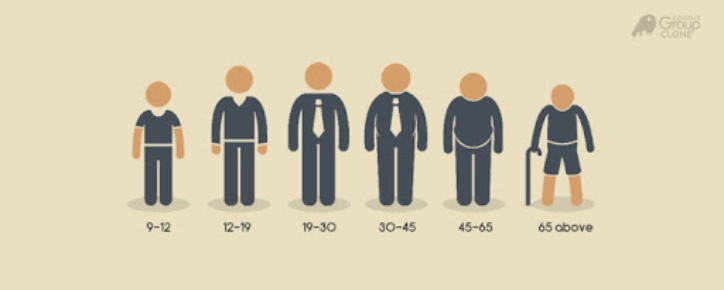

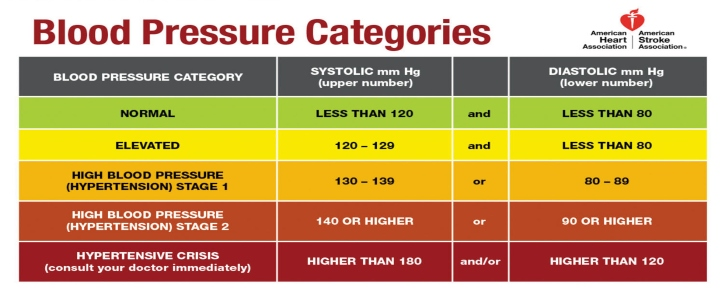

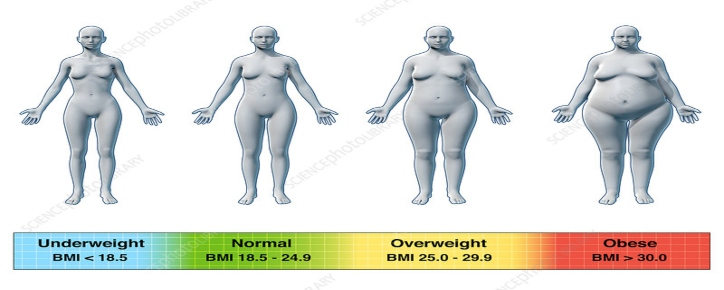

In [ ]:
def age(row):
    if row['Age'] >= 19 and row['Age'] < 30:
        val = 1
    elif row['Age'] >= 30 and row['Age'] < 45:
        val = 2
    elif row['Age'] >= 45 and row['Age'] < 65:
        val = 3
    else:
        val = 4
    
    return val


def blood_pressure(row):
    if row['BloodPressure'] >= 80 and row['BloodPressure'] < 90:
        val = 2
    elif row['BloodPressure'] >= 90 and row['BloodPressure'] < 120:
        val = 3
    elif row['BloodPressure'] >= 120:
        val = 4
    else:
        val = 1
    
    return val


def bmi(row):
    if row['BMI'] >= 18.5 and row['BMI'] <= 24.9:
        val = 2
    elif row['BMI'] >= 25 and row['BMI'] <= 29.9:
        val = 3
    elif row['BMI'] >= 30:
        val = 4
    else:
        val = 1
    
    return val

In [ ]:
df['Age_Risk'] = df.apply(age, axis=1)
df['Blood_Pressure_Risk'] = df.apply(blood_pressure, axis=1)
df['BMI_Risk'] = df.apply(bmi, axis=1)

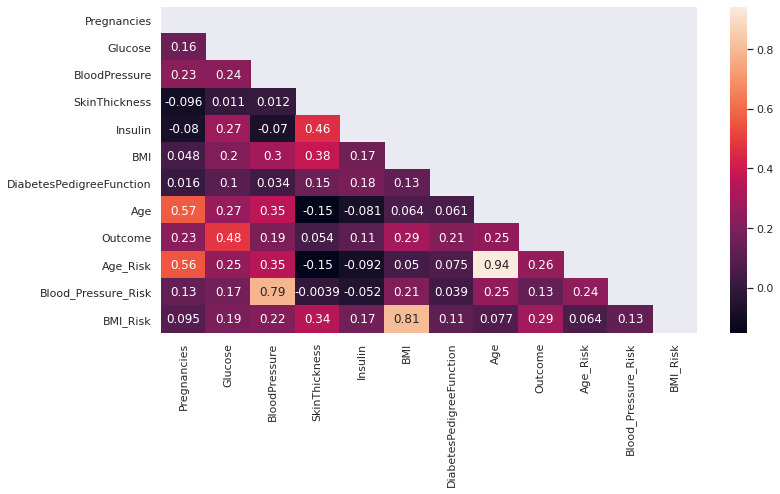

In [ ]:
corr = df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.set()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

In [ ]:
df.corrwith(df.Outcome).sort_values()[:-1]

SkinThickness               0.053958
Insulin                     0.109621
Blood_Pressure_Risk         0.133326
BloodPressure               0.191600
DiabetesPedigreeFunction    0.213890
Pregnancies                 0.228647
Age                         0.248014
Age_Risk                    0.258130
BMI_Risk                    0.287963
BMI                         0.293890
Glucose                     0.481968
dtype: float64

---

# **- Implementing Knn classifier model by sklearn**

In [ ]:
# helping methods
from scipy.stats import mode
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

> # **Finding best correlated features**

In [ ]:
X = df[df.columns.difference(['Outcome'])]
y = df.Outcome

In [ ]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# scaling features
scaler_obj = StandardScaler()
X_train = pd.DataFrame(scaler_obj.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_obj.transform(X_test), columns=X_test.columns)

In [ ]:
test_model = KNeighborsClassifier()
test_model.fit(X_train, y_train)
test_model.score(X_test, y_test)

0.7391304347826086

In [ ]:
target_feats = ['Glucose', 'BMI', 'Age_Risk', 'Pregnancies', 'DiabetesPedigreeFunction', 'BloodPressure']

In [ ]:
test_model = KNeighborsClassifier()
test_model.fit(X_train[target_feats], y_train)
test_model.score(X_test[target_feats], y_test)

0.7463768115942029

In [ ]:
target_feats = ['Glucose', 'BMI', 'Age_Risk', 'Pregnancies', 'DiabetesPedigreeFunction']

In [ ]:
test_model = KNeighborsClassifier()
test_model.fit(X_train[target_feats], y_train)
test_model.score(X_test[target_feats], y_test)

0.7681159420289855

In [ ]:
target_feats = ['Glucose', 'BMI', 'Age_Risk', 'Pregnancies']
test_model = KNeighborsClassifier()
test_model.fit(X_train[target_feats], y_train)
test_model.score(X_test[target_feats], y_test)

0.7608695652173914

In [ ]:
target_feats = ['Glucose', 'BMI', 'Age_Risk']
test_model = KNeighborsClassifier()
test_model.fit(X_train[target_feats], y_train)
test_model.score(X_test[target_feats], y_test)

0.7536231884057971

In [ ]:
target_feats = ['Glucose', 'Pregnancies', 'BMI_Risk', 'Age']
test_model = KNeighborsClassifier()
test_model.fit(X_train[target_feats], y_train)
test_model.score(X_test[target_feats], y_test)

0.7753623188405797

# **Best features found ['Glucose', 'Pregnancies', 'BMI_Risk', 'Age']**

---

In [ ]:
# storing models and scores
results = {}
target_feats = ['Glucose', 'Pregnancies', 'BMI_Risk', 'Age']

> # **A) test_size = 0.2**

In [ ]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X[target_feats], y, test_size=0.2, random_state=0)

In [ ]:
# scaling features
scaler_obj = StandardScaler()
X_train = pd.DataFrame(scaler_obj.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_obj.transform(X_test), columns=X_test.columns)

> # **Testing model on default weight (uniform)**

In [ ]:
#Choosing a K Value for highest score
scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test, y_test))

best_neighbour = scores.index(max(scores)) + 1
best_neighbour

25

In [ ]:
#Choosing a K Value for lowest error_rate
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

best_neighbour = error_rate.index(min(error_rate)) + 1
best_neighbour

25

In [ ]:
#Choosing a K Value for highest score
f1_scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    f1_scores.append(f1_score(y_test, knn.predict(X_test)))

best_neighbour = f1_scores.index(max(f1_scores)) + 1
best_neighbour

3

In [ ]:
model = KNeighborsClassifier(n_neighbors=25, weights='uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
score = f1_score(y_test, y_pred)
print("F1_Score:", score)
results["test:0.2/wght:uni/neigh:25"] = round(score, 3)

Accuracy: 0.7971014492753623
F1_Score: 0.6666666666666666


In [ ]:
model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
score = f1_score(y_test, y_pred)
print("F1_Score:", score)
results["test:0.2/wght:uni/neigh:3"] = round(score, 3)

Accuracy: 0.7898550724637681
F1_Score: 0.6947368421052632


> # **Testing model on another weight (distance)**

In [ ]:
#Choosing a K Value for highest score
scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test, y_test))

best_neighbour = scores.index(max(scores)) + 1
best_neighbour

17

In [ ]:
#Choosing a K Value for lowest error_rate
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

best_neighbour = error_rate.index(min(error_rate)) + 1
best_neighbour

17

In [ ]:
#Choosing a K Value for highest score
f1_scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    f1_scores.append(f1_score(y_test, knn.predict(X_test)))

best_neighbour = f1_scores.index(max(f1_scores)) + 1
best_neighbour

17

In [ ]:
model = KNeighborsClassifier(n_neighbors=17, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
score = f1_score(y_test, y_pred)
print("F1_Score:", score)
results["test:0.2/wght:dist/neigh:17"] = round(score, 3)

Accuracy: 0.8115942028985508
F1_Score: 0.7111111111111111


---

> # **B) test_size = 0.3**

In [ ]:
# splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X[target_feats], y, test_size=0.3, random_state=0)

In [ ]:
# scaling features
scaler_obj = StandardScaler()
X_train = pd.DataFrame(scaler_obj.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_obj.transform(X_test), columns=X_test.columns)

> # **Testing model on default weight (uniform)**

In [ ]:
#Choosing a K Value for highest score
scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test, y_test))

best_neighbour = scores.index(max(scores)) + 1
best_neighbour

38

In [ ]:
#Choosing a K Value for lowest error_rate
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

best_neighbour = error_rate.index(min(error_rate)) + 1
best_neighbour

38

In [ ]:
#Choosing a K Value for highest score
f1_scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    f1_scores.append(f1_score(y_test, knn.predict(X_test)))

best_neighbour = f1_scores.index(max(f1_scores)) + 1
best_neighbour

38

In [ ]:
model = KNeighborsClassifier(n_neighbors=38, weights='uniform')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
score = f1_score(y_test, y_pred)
print("F1_Score:", score)
results["test:0.3/wght:uni/neigh:38"] = round(score, 3)

Accuracy: 0.8115942028985508
F1_Score: 0.6776859504132232


> # **Testing model on another weight (distance)**

In [ ]:
#Choosing a K Value for highest score
scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test, y_test))

best_neighbour = scores.index(max(scores)) + 1
best_neighbour

45

In [ ]:
#Choosing a K Value for lowest error_rate
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

best_neighbour = error_rate.index(min(error_rate)) + 1
best_neighbour

45

In [ ]:
#Choosing a K Value for highest score
f1_scores = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train,y_train)
    f1_scores.append(f1_score(y_test, knn.predict(X_test)))

best_neighbour = f1_scores.index(max(f1_scores)) + 1
best_neighbour

17

In [ ]:
model = KNeighborsClassifier(n_neighbors=45, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
score = f1_score(y_test, y_pred)
print("F1_Score:", score)
results["test:0.3/wght:dist/neigh:45"] = round(score, 3)

Accuracy: 0.8115942028985508
F1_Score: 0.6829268292682927


In [ ]:
model = KNeighborsClassifier(n_neighbors=17, weights='distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))
score = f1_score(y_test, y_pred)
print("F1_Score:", score)
results["test:0.3/wght:dist/neigh:17"] = round(score, 3)

Accuracy: 0.8019323671497585
F1_Score: 0.6870229007633588


In [ ]:
results

{'test:0.2/wght:dist/neigh:17': 0.711,
 'test:0.2/wght:uni/neigh:25': 0.667,
 'test:0.2/wght:uni/neigh:3': 0.695,
 'test:0.3/wght:dist/neigh:17': 0.687,
 'test:0.3/wght:dist/neigh:45': 0.683,
 'test:0.3/wght:uni/neigh:38': 0.678}

## **Best score 0.711 found at test_size 0.2, weights: distance and n_neighbours: 17**

---

# **- Implementing Knn classifier model from scratch**

In [ ]:
class KnnClassifier:

  def __init__(self, k=5, weights='distance', metric='minkowski'):
    self.k = k
    self.weights = weights
    self.metric = metric
    self.y_pred = []

  def fit_predict(self, train_x, train_y, test_x):
    pred = []
    for i in range(len(test_x)):
      dl, yl = [], []

      dl = list(np.sqrt(np.sum((train_x - test_x.iloc[i])**2, axis=1)).round(0))
      yl = list(train_y)

      new_yl = [j for i, j in sorted(zip(dl,yl))]

      pred.append(mode(new_yl[:self.k])[0][0])
    
    self.y_pred = pred


  def accuracy(self, y_test, y_pred):
    return np.mean(y_test == y_pred)


  def score_f1(self, y_test, y_pred):
    return f1_score(y_test, y_pred)


In [ ]:
model = KnnClassifier(k=17)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[target_feats], y, test_size=0.2, random_state=0)

In [ ]:
model.fit_predict(X_train, y_train, X_test)

In [ ]:
model.accuracy(y_test, model.y_pred)

0.7898550724637681

In [ ]:
model.score_f1(y_test, model.y_pred)

0.6588235294117648

> # **Close results to the model above from library**

---